# RFM Analsis

RFM analysis enables personalized marketing, increases engagement, and allows you to create specific, relevant offers to the right groups of customers.

- Identify Top/Loyal Customers to sustain good customer exprience
- Identity Customers that have Potential to Grow 
- Identify Customers that need Attention

## Import libraries

In [3]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import squarify #Treemap Viz

## Read dataset

In [4]:
online = pd.read_csv('data.csv', encoding = "ISO-8859-1")

# Convert InvoiceDate from object to datetime format
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

## Check Data for Missing Values

In [5]:
print('{:,} rows; {:,} columns'
      .format(online.shape[0], online.shape[1]))
print('{:,} transactions don\'t have a customer id'
      .format(online[online.CustomerID.isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(online['InvoiceDate'].min(),
                                    online['InvoiceDate'].max()))

541,909 rows; 8 columns
135,080 transactions don't have a customer id
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [7]:
#Drop rows with missing Customer Id
online.dropna(inplace = True)

## Summarize Data by Customer Id

In [8]:
# Create TotalSum by multiplying Quantity and UnitPrice
online['TotalSum'] = online['Quantity'] * online['UnitPrice']
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [14]:
# Create a Reference Data
ref_date = online['InvoiceDate'].max() + timedelta(days=1)
print(ref_date)

2011-12-10 12:50:00


In [16]:
# Grouping by CustomerID
data_process = online.groupby(['CustomerID']).agg({
        'InvoiceDate': lambda x: (ref_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalSum': 'sum'})

data_process.head()

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [22]:
# Rename the columns 
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))
data_process.head()

4,372 rows; 3 columns


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


C:\Users\k_naik\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


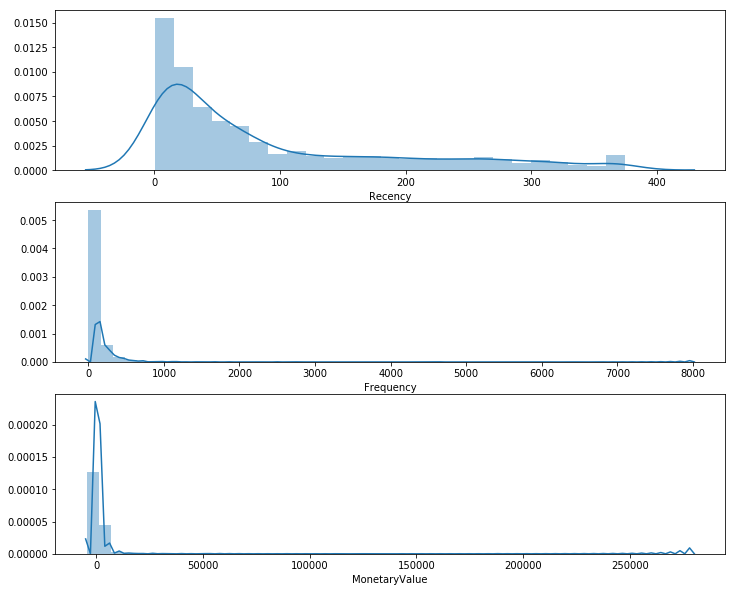

In [23]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])

# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])

# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])

# Show the plot
plt.show()

### Notes
- Data is skewed 

## Convert R, F, M to Quantiles using qcut()

In [24]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)

# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)

# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)

# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)

data_process.head()

,Recency,Frequency,MonetaryValue,R,F
CustomerID,,,,,
12346.0,326,2,0.00,1,1
12347.0,2,182,4310.00,4,4
12348.0,75,31,1797.24,2,2
12349.0,19,73,1757.55,3,3
12350.0,310,17,334.40,1,1


In [25]:
# Create labels for MonetaryValue
m_labels = range(1, 5)

# Assign these labels to four equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)

# Create new column M
data_process = data_process.assign(M = m_groups.values)

data_process.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


# Calculate RFM

In [27]:
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [30]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,3.0
12347.0,2,182,4310.00,4,4,4,12.0
12348.0,75,31,1797.24,2,2,4,8.0
12349.0,19,73,1757.55,3,3,4,10.0
12350.0,310,17,334.40,1,1,2,4.0


## Segment Customers by RFM Score

In [31]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,3.0,Require Activation
12347.0,2,182,4310.00,4,4,4,12.0,Can't Loose Them
12348.0,75,31,1797.24,2,2,4,8.0,Champions
12349.0,19,73,1757.55,3,3,4,10.0,Can't Loose Them
12350.0,310,17,334.40,1,1,2,4.0,Needs Attention


## Show Summary by Cutomer Segment

In [38]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      25.2     195.1        4130.3  1690
Champions             62.7      57.0         974.7   467
Loyal                 78.8      39.7         724.2   447
Needs Attention      174.5      13.9         227.1   391
Potential             94.3      28.5         491.8   468
Promising            153.0      21.2         346.8   517
Require Activation   264.8       7.8         109.1   392

### Summary of Analysis
- Answer 1: Top 3 Segments are Loyal/Top Customers
- Answer 2: Groups Potential, Promising are good groups to grow 
- Answer 3: Need Attention Group may be in the verge to Lapsing

## Marketing Ads Strategy
- Potential - Roll out Freebies to show that you value them
- Promising - Send out offers on their Wishlist Items and Limited time offers
- Need Attention - Create brand Awareness and let them know about what is good at the store
- Require Activation - Maybe went to Competitors. Understand and see how you can win them back

## Visualize the Customer Groups

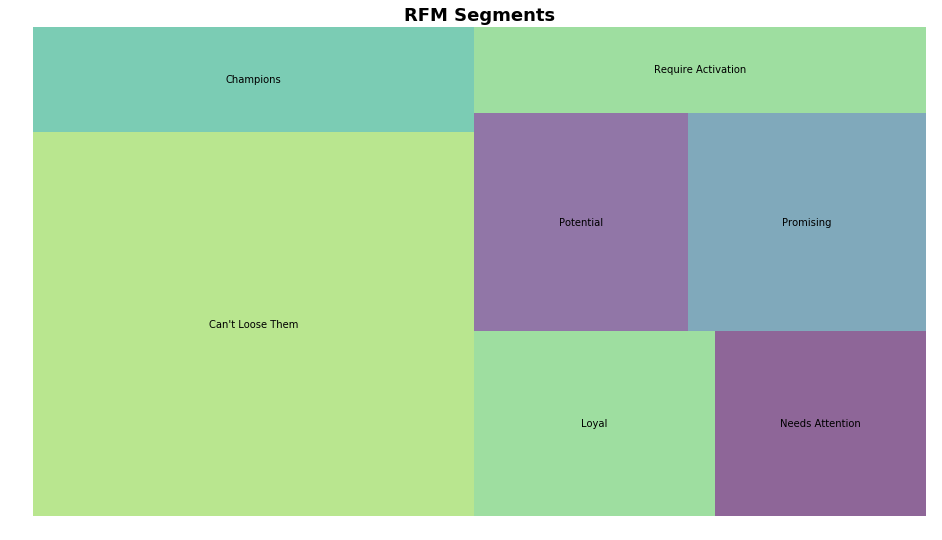

In [39]:
# Imprvove by Adding Overall Percentage to the Graph
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()